In [186]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt 
import matplotlib.dates as mdates

In [187]:
def convertDate(df, dateFormat):
    dates = []
    for data in df:
        dates.append(dt.datetime.strptime(str(data), dateFormat).date())
    return dates




def mergedDates(date1, date2):
    print(str(date1[0].isoformat).replace("-",""))
    #firstDate
    
    mergedDates = date2
    for date in date1:
        if not date in date2:
            mergedDates.append(mergedDates)
    return mergedDates

In [188]:
df = pd.read_csv('covid.results.deterministic.csv',sep='\t')

dfD = pd.read_csv('covid_19_manual.csv')

In [189]:
cum_infected = np.zeros(len(df['infectious']))
infectious = df['infectious']
dead = df['dead']
recovered = df['recovered']

cum_infected[0] = infectious[0]
cum_infected[1] = infectious[1]
cum_i = cum_infected[1]

for i in range(2,len(cum_infected)):
    delta_infect = infectious[i] - infectious[i-1]
    delta_recovered = recovered[i-1] - recovered[i-2]
    delta_dead = dead[i-1] - dead[i-2]
    new_infect =  delta_infect + delta_recovered + delta_dead
    cum_i = cum_i + new_infect
    cum_infected[i] = cum_i

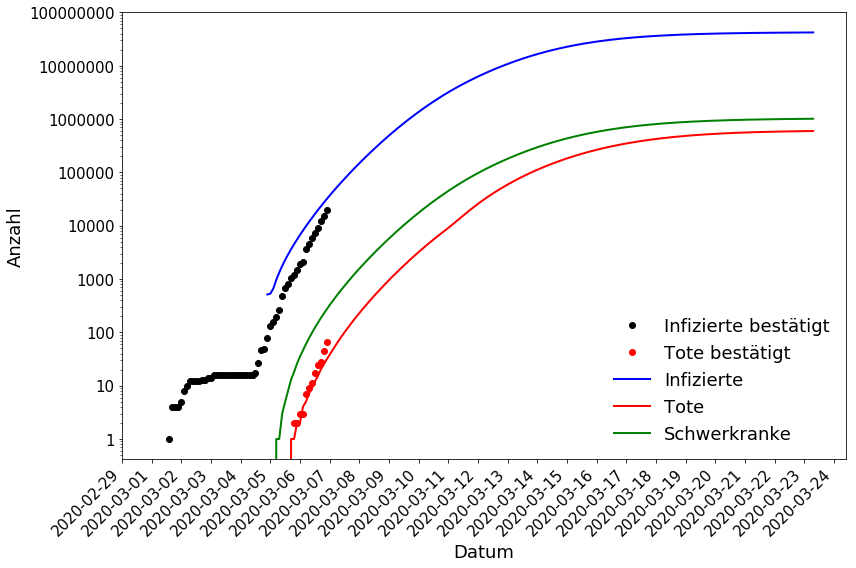

In [204]:
x = range(0,len(df['infectious']))

fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))

xDate = convertDate(df['time'],"%Y-%m-%d")





data = dfD[dfD['Country/Region'] == 'Germany']


dates2 = convertDate(dfD[dfD['Country/Region'] == 'Germany']["Date"].values, "%m/%d/%y")

ax.plot(dates2, dfD[dfD['Country/Region'] == 'Germany']["Confirmed"].values, 'ko', label = 'Infizierte bestätigt')
ax.plot(dates2, dfD[dfD['Country/Region'] == 'Germany']["Deaths"].values, 'ro', label = 'Tote bestätigt')



plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

ax.plot(xDate,cum_infected, color = 'b',label = 'Infizierte',linewidth=2)
ax.plot(xDate,df['dead'], color = 'r', label = 'Tote',linewidth=2)
ax.plot(xDate,df['intensive'], color = 'g', label = 'Schwerkranke',linewidth=2)



plt.gcf().autofmt_xdate()
ax.set_yscale('log')

ax.set_xticks(ax.get_xticks()[::10])
ax.set_xticklabels(dates,rotation=45,fontsize=15)



ax.set_yticklabels([int(x) for x in ax.get_yticks()],fontsize=15)

ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()

plt.savefig('Deutschland_Model_Bestätigt.png',dpi=300)